In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import fsolve

DailyPrices = pd.read_csv("DailyPrices.csv")
AAPL_Options= pd.read_csv("AAPL_Options.csv")
problem3= pd.read_csv("problem3.csv")

In [2]:
# Problem1

# Assume you a call and a put option with the following 
# ● Current Stock Price $165 
# ● Current Date 03/03/2023 
# ● Options Expiration Date 03/17/2023 
# ● Risk Free Rate of 4.25% 
# ● Continuously Compounding Coupon of 0.53% 
# Calculate the time to maturity using calendar days (not trading days). 
# For a range of implied volatilities between 10% and 80%, plot the value of the call and the put. 
# Discuss these graphs. How does the supply and demand affect the implied volatility? 

# Calculate the time to maturity using calendar days (not trading days). 

Current_Date = pd.to_datetime('2023-03-03').date()
Expiration_Date = pd.to_datetime('2023-03-17').date()
Time2Maturity = (Expiration_Date -Current_Date).days

print("The time to maturity using calendar days of the option is "+str(Time2Maturity)+" days")


The time to maturity using calendar days of the option is 14 days


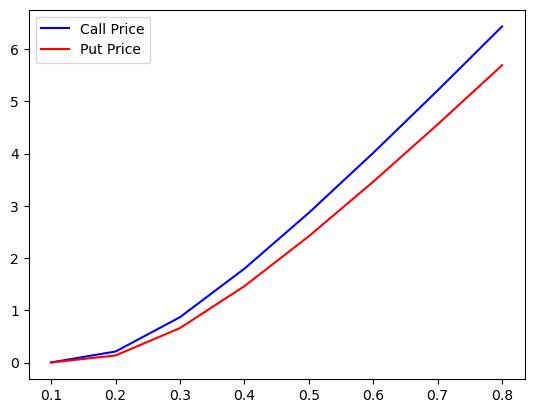

In [4]:
# plot the value of the call and the put

def BlackScholes_Call(S,X,T,sigma,r,b):
    d1=(np.log(S/X)+(b+sigma*sigma/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    call_price=S*np.exp(T*(b-r))*norm.cdf(d1)-X*np.exp(-r*T)*norm.cdf(d2)
    
    return call_price

def BlackScholes_Put(S,X,T,sigma,r,b):
    d1=(np.log(S/X)+(b+sigma*sigma/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    Put_price=X*np.exp(-r*T)*norm.cdf(-d2)-S*np.exp(T*(b-r))*norm.cdf(-d1)
    
    return Put_price
    
    
S = 165
X_c = 175
X_p = 155
T = Time2Maturity/365
r = 0.0425
q = 0.0053
b=r-q
sigmas=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
calls = []
puts = []
for sigma in sigmas:
    calls.append(BlackScholes_Call(S,X_c,T,sigma,r,b))
    puts.append(BlackScholes_Put(S,X_p,T,sigma,r,b))


# plt.figure(fig_size=(16,10))
plt.plot(sigmas,calls,label="Call Price",color='b')
plt.plot(sigmas,puts,label="Put Price",color='r')
plt.legend()
plt.show()

In [5]:
#Problem 2

# Use the options found in AAPL_Options.csv
# ● Current AAPL price is 151.03
# ● Current Date, Risk Free Rate and Dividend Rate are the same as problem #1.
# ● Current Date 03/03/2023 
# ● Risk Free Rate of 4.25% 
# ● Continuously Compounding Coupon of 0.53% 
# Calculate the implied volatility for each option.
# Plot the implied volatility vs the strike price for Puts and Calls. Discuss the shape of these graphs. What market dynamics could make these graphs?
# There are bonus points available on this question based on your discussion. Take some time to research if needed.

AAPL_Options= pd.read_csv("AAPL_Options.csv")
# Calculate the implied volatility for each option.


In [6]:
AAPL_Options['Current_Date'] = pd.to_datetime('2023-03-03')
AAPL_Options['TTM']=(pd.to_datetime(AAPL_Options['Expiration'])-AAPL_Options['Current_Date'])
S = 151.03
r = 0.0425
q = 0.0053
b = r-q

def implied_vol_call(S,X,T,r,b,price):
    implied_vol= lambda x: BlackScholes_Call(S,X,T,x,r,b) - price
    return fsolve(implied_vol, 1)[0]

def implied_vol_put(S,X,T,r,b,price):
    implied_vol= lambda x: BlackScholes_Put(S,X,T,x,r,b) - price
    return fsolve(implied_vol, 0.8)[0]

implied_vol=[]

for i in range(len(AAPL_Options)):
    X=AAPL_Options.iloc[i]['Strike']
    price=AAPL_Options.iloc[i]['Last Price']
    T=AAPL_Options.iloc[i]['TTM'].days/365
    if AAPL_Options.iloc[i]['Type']=="Call":
        implied_vol.append( implied_vol_call(S,X,T,r,b,price) )
    else:
        implied_vol.append( implied_vol_put(S,X,T,r,b,price) )
        
AAPL_Options['implied_vol']=implied_vol

In [7]:
AAPL_Options

,Stock,Expiration,Type,Strike,Last Price,Current_Date,TTM,implied_vol
0,AAPL,4/21/2023,Call,125,27.300,2023-03-03,49 days,0.374597
1,AAPL,4/21/2023,Call,130,22.575,2023-03-03,49 days,0.342351
2,AAPL,4/21/2023,Call,135,17.750,2023-03-03,49 days,0.292522
3,AAPL,4/21/2023,Call,140,13.850,2023-03-03,49 days,0.299358
4,AAPL,4/21/2023,Call,145,9.975,2023-03-03,49 days,0.278743
5,AAPL,4/21/2023,Call,150,6.700,2023-03-03,49 days,0.263141
6,AAPL,4/21/2023,Call,155,4.050,2023-03-03,49 days,0.246828
7,AAPL,4/21/2023,Call,160,2.210,2023-03-03,49 days,0.235242
8,AAPL,4/21/2023,Call,165,1.035,2023-03-03,49 days,0.223567
9,AAPL,4/21/2023,Call,170,0.460,2023-03-03,49 days,0.219339


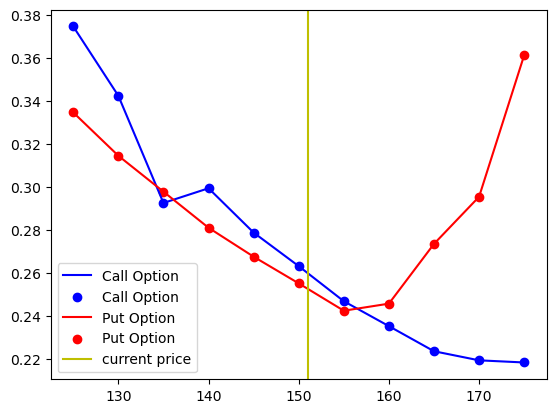

In [8]:
# Plot the implied volatility vs the strike price for Puts and Calls.
call_sigma=AAPL_Options[AAPL_Options['Type']=='Call'].implied_vol
call_X=AAPL_Options[AAPL_Options['Type']=='Call'].Strike
put_sigma=AAPL_Options[AAPL_Options['Type']=='Put'].implied_vol
put_X=AAPL_Options[AAPL_Options['Type']=='Put'].Strike

plt.plot(call_X,call_sigma,label="Call Option",color='b')
plt.scatter(call_X,call_sigma,label="Call Option",color='b')
plt.plot(put_X,put_sigma,label="Put Option",color='r')
plt.scatter(put_X,put_sigma,label="Put Option",color='r')
plt.axvline(S,color='y', label='current price')

plt.legend()
plt.show()

In [8]:
# Problem 3
# Use the portfolios found in problem3.csv 
# ● Current AAPL price is 151.03 
# ● Current Date, Risk Free Rate and Dividend Rate are the same as problem #1. 
# For each of the portfolios, graph the portfolio value over a range of underlying values. Plot the portfolio values and discuss the shapes. Bonus points available for tying these graphs to other topics discussed in the lecture. 
# Using DailyPrices.csv. Calculate the log returns of AAPL. Demean the series so there is 0 mean. Fit an AR(1) model to AAPL returns. Simulate AAPL returns 10 days ahead and apply those returns to the current AAPL price (above). Calculate Mean, VaR and ES. Discuss. 
# Hints: 
# ● you will need to calculate the implied volatility - might not be the same as #2 
# ● you need to take into account the change in dates for option valuations. You are simulating forward in time and options valuations are a function of time 
# ● Calculate the PL from the current portfolio value using Current Date


In [9]:
# For each of the portfolios, graph the portfolio value over a range of underlying values. Plot the portfolio values and discuss the shapes. Bonus points available for tying these graphs to other topics discussed in the lecture. 
# ● you will need to calculate the implied volatility - might not be the same as #2 

problem3['Current_Date'] = pd.to_datetime('2023-03-03')
problem3['TTM']=(pd.to_datetime(problem3['ExpirationDate'])-problem3['Current_Date'])
S = 151.03
r = 0.0425
q = 0.0053
b = r-q


implied_vol=[]

for i in range(len(problem3)):
    X=problem3.iloc[i]['Strike']
    price=problem3.iloc[i]['CurrentPrice']
    T=problem3.iloc[i]['TTM'].days/365
    if problem3.iloc[i]['OptionType']=="Call":
        implied_vol.append( implied_vol_call(S,X,T,r,b,price) )
    elif problem3.iloc[i]['OptionType']=="Put":
        implied_vol.append( implied_vol_put(S,X,T,r,b,price) )
    else:
        implied_vol.append(np.nan)
        
problem3['implied_vol']=implied_vol

In [10]:
problem3

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Current_Date,TTM,implied_vol
0,Straddle,Option,AAPL,1,Call,4/21/2023,150.0,6.80,2023-03-03,49 days,0.267740
1,Straddle,Option,AAPL,1,Put,4/21/2023,150.0,4.85,2023-03-03,49 days,0.259735
2,SynLong,Option,AAPL,1,Call,4/21/2023,150.0,6.80,2023-03-03,49 days,0.267740
3,SynLong,Option,AAPL,-1,Put,4/21/2023,150.0,4.85,2023-03-03,49 days,0.259735
4,CallSpread,Option,AAPL,1,Call,4/21/2023,150.0,6.80,2023-03-03,49 days,0.267740
5,CallSpread,Option,AAPL,-1,Call,4/21/2023,160.0,2.21,2023-03-03,49 days,0.235242
6,PutSpread,Option,AAPL,1,Put,4/21/2023,150.0,4.85,2023-03-03,49 days,0.259735
7,PutSpread,Option,AAPL,-1,Put,4/21/2023,140.0,1.84,2023-03-03,49 days,0.280994
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,151.03,2023-03-03,NaT,NaN
9,Call,Option,AAPL,1,Call,4/21/2023,150.0,6.80,2023-03-03,49 days,0.267740


In [11]:
# ● you need to take into account the change in dates for option valuations. You are simulating forward in time and options valuations are a function of time 

S_values = list(range(120,200))
new_port=problem3[['Portfolio','Type','Underlying','Holding','OptionType','Strike','ExpirationDate','implied_vol']]

def valuations(S_values,df,current_date):
    df1=df[['Portfolio']]
    
    for S in S_values:
        values = []
        for i in range(df.shape[0]):
            if df.iloc[i]['Type'] == 'Option':
                T2M = pd.to_datetime(df.iloc[i]['ExpirationDate'])-current_date
                T2M=T2M.days/365
                X = df.iloc[i]['Strike']
                sigma =df.iloc[i]["implied_vol"]
                if df.iloc[i]['OptionType'] == 'Call':
                    value = BlackScholes_Call(S,X,T2M,sigma,r,b)*df.iloc[i]["Holding"]
                elif df.iloc[i]['OptionType'] == 'Put':
                    value = BlackScholes_Put(S,X,T2M,sigma,r,b)*df.iloc[i]["Holding"]
                values.append(value)
            else:
                value=S*df.iloc[i]["Holding"]
                values.append(S)

        df1[str(S)] = values

    return df1

Current_Date = pd.to_datetime('2023-03-03')

value_df1 = valuations(S_values,new_port,Current_Date)
value_df2 = value_df1.groupby('Portfolio').sum().T


C:\Users\98317\AppData\Local\Temp\ipykernel_29828\4134559773.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[str(S)] = values
C:\Users\98317\AppData\Local\Temp\ipykernel_29828\4134559773.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[str(S)] = values
C:\Users\98317\AppData\Local\Temp\ipykernel_29828\4134559773.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [12]:
value_df2

Portfolio,Call,CallSpread,CoveredCall,ProtectedPut,Put,PutSpread,Stock,Straddle,SynLong
120,0.059849,0.058214,119.989827,144.410459,29.279583,9.553442,120.0,29.339432,-29.219734
121,0.076352,0.073999,120.986177,144.448055,28.294175,9.479922,121.0,28.370527,-28.217823
122,0.096641,0.093293,121.981400,144.492978,27.312150,9.396334,122.0,27.408791,-27.215509
123,0.121389,0.116676,122.975207,144.546285,26.334154,9.301999,123.0,26.455543,-26.212765
124,0.151343,0.144778,123.967255,144.609107,25.360911,9.196306,124.0,25.512254,-25.209568
...,...,...,...,...,...,...,...,...,...
195,45.730986,9.911934,154.233478,195.004829,0.011953,0.009510,195.0,45.742938,45.719033
196,46.727723,9.917019,154.238015,196.004008,0.009988,0.007959,196.0,46.737710,46.717735
197,47.724842,9.921328,154.241955,197.003322,0.008333,0.006650,197.0,47.733175,47.716510
198,48.722290,9.924968,154.245387,198.002749,0.006941,0.005547,198.0,48.729231,48.715349


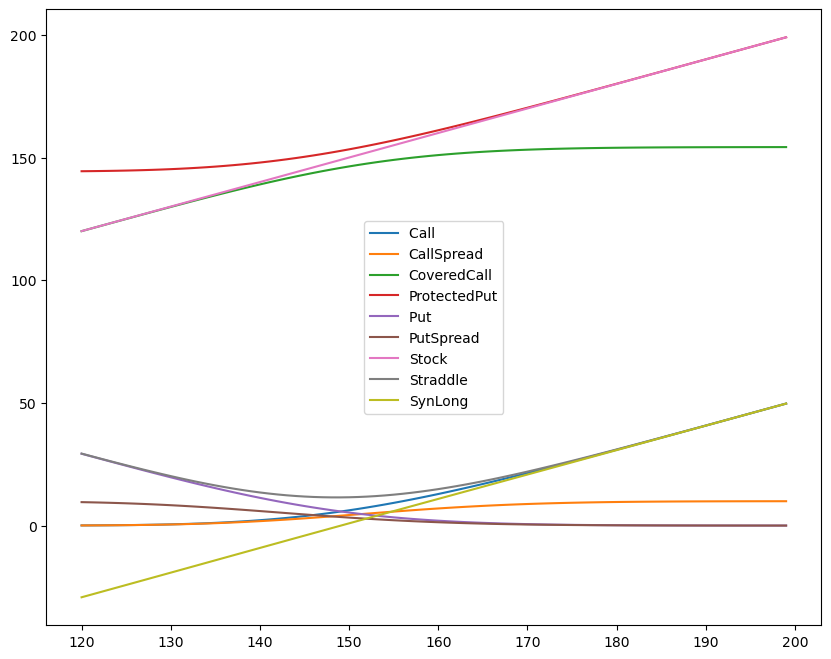

In [13]:
plt.figure(figsize=(10,8))
x=np.array(value_df2.index)
x=x.astype(int)
for i in value_df2.columns:
    plt.plot(x,value_df2[i],label=str(i))

plt.legend()
plt.show()

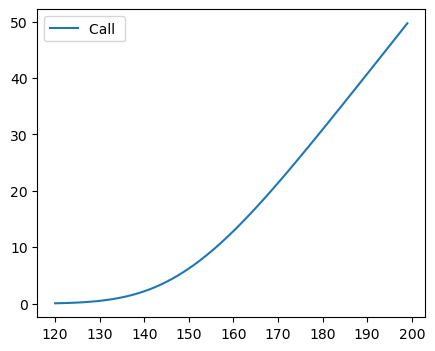

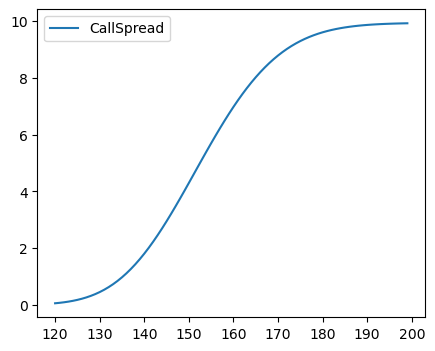

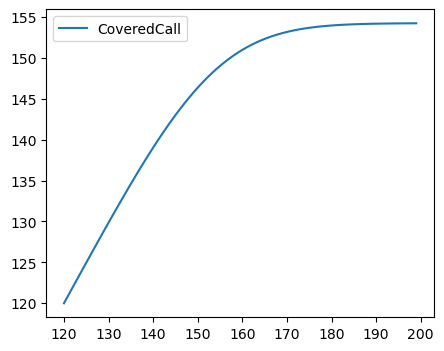

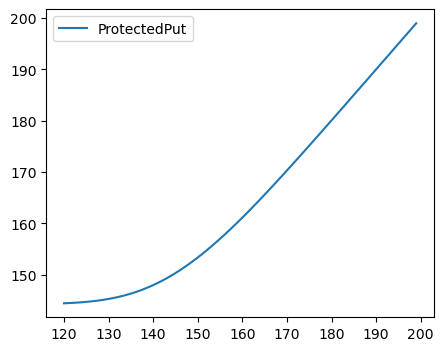

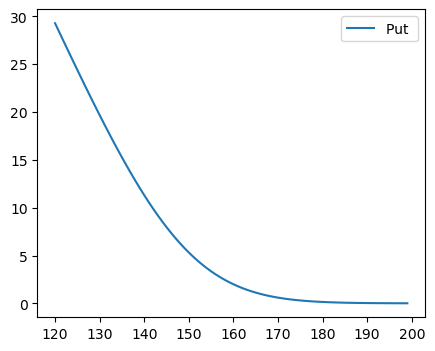

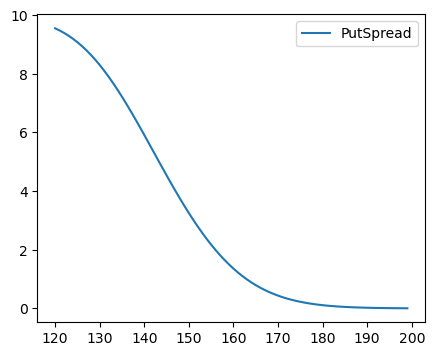

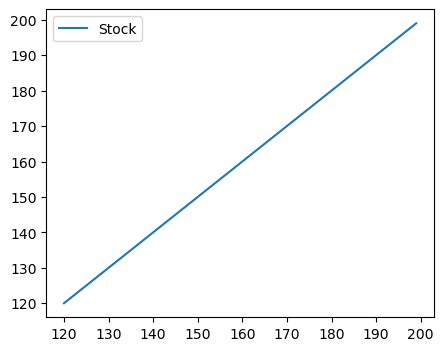

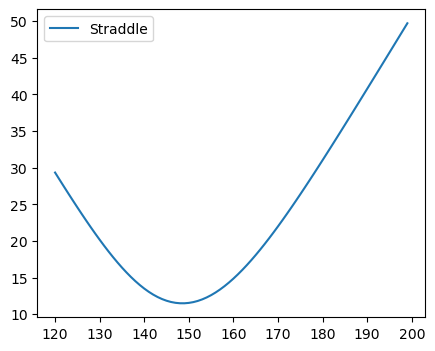

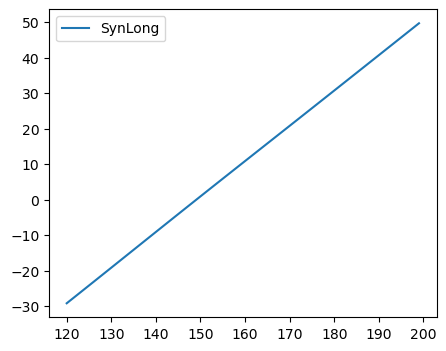

In [14]:

x=np.array(value_df2.index)
x=x.astype(int)
for i in value_df2.columns:
    plt.figure(figsize=(5,4))
    plt.plot(x,value_df2[i],label=str(i))
    plt.legend()
    plt.show()

In [15]:
# Using DailyPrices.csv. Calculate the log returns of AAPL. Demean the series so there is 0 mean. Fit an AR(1) model to AAPL returns. Simulate AAPL returns 10 days ahead and apply those returns to the current AAPL price (above). Calculate Mean, VaR and ES.
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

DailyPrices['Date']=pd.to_datetime(DailyPrices['Date'])
DailyPrices=DailyPrices.sort_values(by=['Date'])
returns=DailyPrices.set_index(['Date'])
returns=np.log(returns/returns.shift())
aapl_returns=returns['AAPL'].dropna()
aapl_mean=aapl_returns.mean()
aapl_returns=aapl_returns-aapl_mean
aapl_std=aapl_returns.std()

# model = sm.tsa.ar_model.AutoReg(aapl_returns, lags = 1)
model = ARIMA(aapl_returns, order=(1 ,0,0))
results = model.fit()
a = results.params[0]
beta = results.params[1]
sig=results.resid.std()
last_price=[]


for i in range(500):
    simulate_ret=[]
    simulate_price=[]
    tmp=aapl_returns[-1]
    pre_price=151.03
    simulate_error = norm.rvs(0,sig,size=10)
    
    for i in range(10):
        tmp = a + beta*tmp+simulate_error[i]
        new_price=np.exp(tmp)*pre_price
        simulate_ret.append(tmp)
        simulate_price.append(new_price)
        pre_price=new_price
    
    last_price.append(simulate_price[9])
    

c:\Users\98317\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\98317\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\98317\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
Current_Date2 = pd.to_datetime('2023-03-13')
simulate_value_df1 = valuations(last_price,new_port,Current_Date2)
simulate_value_df2 = simulate_value_df1.groupby('Portfolio').sum().T

C:\Users\98317\AppData\Local\Temp\ipykernel_29828\4134559773.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[str(S)] = values
C:\Users\98317\AppData\Local\Temp\ipykernel_29828\4134559773.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[str(S)] = values
C:\Users\98317\AppData\Local\Temp\ipykernel_29828\4134559773.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [17]:
port_list=problem3['Portfolio'].unique()
current_value={}
for i in port_list:
    current_value[i]=0

for i in range(len(problem3)):
    tmp=problem3.iloc[i]['Portfolio']
    current_value[tmp]+=problem3.iloc[i]['CurrentPrice']*problem3.iloc[i]['Holding']
    

In [20]:
simulate_value_df2

Portfolio,Call,CallSpread,CoveredCall,ProtectedPut,Put,PutSpread,Stock,Straddle,SynLong
152.91549350998588,7.211781,4.974692,148.673722,154.921651,3.551307,2.443681,152.915494,10.763087,3.660474
165.85516511332585,17.223184,8.339353,153.068191,166.182831,0.703550,0.544624,165.855165,17.926734,16.519635
138.13926293756455,1.271025,1.130928,137.686459,146.828443,12.431325,6.671295,138.139263,13.702350,-11.160300
141.36564086964108,2.033694,1.738463,140.535532,148.023635,9.945167,5.708069,141.365641,11.978861,-7.911473
150.57527290372278,5.837821,4.243864,147.342077,153.216480,4.512476,3.013646,150.575273,10.350297,1.325345
...,...,...,...,...,...,...,...,...,...
148.46818381226527,4.740758,3.599257,145.995024,151.804457,5.522180,3.580061,148.468184,10.262938,-0.781423
144.25587020635584,2.954466,2.419016,142.911832,149.371969,7.959778,4.821080,144.255870,10.914244,-5.005312
142.1282238457043,2.253676,1.906015,141.180493,148.353618,9.397865,5.474251,142.128224,11.651542,-7.144189
139.95433411746254,1.667767,1.452340,139.311630,147.461287,10.999962,6.136293,139.954334,12.667728,-9.332195


In [18]:
from scipy.stats import t
import scipy.optimize as optimize


def Historic_Simulation(price,alpha):
    VaR=-np.percentile(price,alpha)
    
    return VaR

def MLE_t(pars, x):
    df = pars[0]
    loc=pars[1]
    scale = pars[2]
    ll = np.log(t.pdf(x, df=df,loc=loc,scale=scale)) 
    return -ll.sum()


def t_ES(x, alpha):
    mean_x=x.mean()
    std_x=x.std()
    cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2}, {'type': 'ineq', 'fun': lambda x:  x[2]})
    model = optimize.minimize(fun = MLE_t,  x0 = [2, mean_x,std_x ], constraints=cons, args =x).x
    
    df=model[0]
    loc=model[1]
    scale=model[2]
    t_sample = t.rvs(df =df, loc = loc, scale = scale, size = 10000)
    
    t_VaR=-t.ppf(alpha, df =df, loc = loc, scale = scale)
    
    ES_t=-t_sample[t_sample<-t_VaR].mean()
    
    return  ES_t

mean_df={}
his_var_df={}
t_es_df={}

PnL=simulate_value_df2.copy()
for i in PnL.columns:
    PnL[i]=PnL[i]-current_value[i]
    
PnL_df=PnL.reset_index().drop(columns={'index'})

for i in PnL_df.columns:
    miu=PnL_df[i].mean()
    mean_df[i]=[miu]
    his_var_df[i]=[Historic_Simulation(PnL_df[i],0.05)]
    t_es_df[i]=[t_ES(PnL_df[i],0.05)]
    
mean_df=pd.DataFrame(mean_df).T
his_var_df=pd.DataFrame(his_var_df).T
t_es_df=pd.DataFrame(t_es_df).T

final_df=pd.concat([mean_df,his_var_df,t_es_df],axis=1)
final_df.columns=['mean','Historical VaR','T_ES']
    

c:\Users\98317\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6373: RuntimeWarning: overflow encountered in power
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))
C:\Users\98317\AppData\Local\Temp\ipykernel_29828\897076274.py:14: RuntimeWarning: divide by zero encountered in log
  ll = np.log(t.pdf(x, df=df,loc=loc,scale=scale))


In [19]:
final_df

,mean,Historical VaR,T_ES
Call,0.366747,6.740472,13.281575
CallSpread,-0.216709,4.531848,5.247354
CoveredCall,-0.852272,24.112747,12.584760
ProtectedPut,0.402856,9.465640,14.540918
Put,0.870526,4.817052,9.970494
PutSpread,0.369605,2.982425,4.084320
Stock,-0.303199,28.153272,20.206244
Straddle,1.237273,1.390729,9.317490
SynLong,-0.503779,28.451658,20.479827
